In [130]:
import sys
sys.path.append("/c2/jinakim/Drug_Discovery_j")  # e.g., "/home/jina/merck_code"

import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

from main_merck_all_real import Merck

# List of Merck datasets (tasks)
def plot_cos_sim(vec_type, cos_sim_type):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics.pairwise import cosine_similarity

    dataset_names = [
        "3a4", "logd", "hivint", "metab", "ox2", "rat_f", "cb1", "hivprot", "nk1",
        "pgp", "tdi", "dpp4", "ox1", "ppb", "thrombin"
    ]

    vectors = []
    for name in dataset_names:
        dataset = Merck(
            split="train", vec_type=vec_type,
            dataset=name, is_context=False,
            mvalid_dataset=[], exclude_mval_data_in_context=False
        )

        if cos_sim_type == 'labels':
            vec = np.array([dataset[i][1].item() for i in range(len(dataset))]).reshape(-1, 1)
        elif cos_sim_type == 'data':
            vec = np.array([dataset[i][0].numpy() for i in range(len(dataset))])
        elif cos_sim_type == 'data_mpool':
            vec = np.array([dataset[i][0].numpy() for i in range(len(dataset))]).mean(axis=0)
        else:
            raise ValueError("cos_sim_type must be one of: 'labels', 'data', 'data_mpool'")

        print(f'{name} : {vec.shape}')
        vectors.append(vec)

    # Align and flatten all vectors to 1D, then pad to same length
    max_len = max(v.shape[0] * v.shape[1] if v.ndim > 1 else len(v) for v in vectors)

    padded_vectors = np.array([
        np.pad(v.reshape(-1), (0, max_len - v.size), mode='constant')
        for v in vectors
    ])

    # Compute cosine similarity between datasets
    cos_sim_matrix = cosine_similarity(padded_vectors)

    # Build labeled DataFrame
    cos_sim_df = pd.DataFrame(cos_sim_matrix, index=dataset_names, columns=dataset_names)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cos_sim_df, cmap="rocket_r", square=True, vmin=0, vmax=1, annot=False)
    plt.title(f"Cosine Similarity Between Merck Datasets ({cos_sim_type}, vec_type={vec_type})")
    plt.tight_layout()
    plt.show()

    return cos_sim_df




=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['PGP_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []


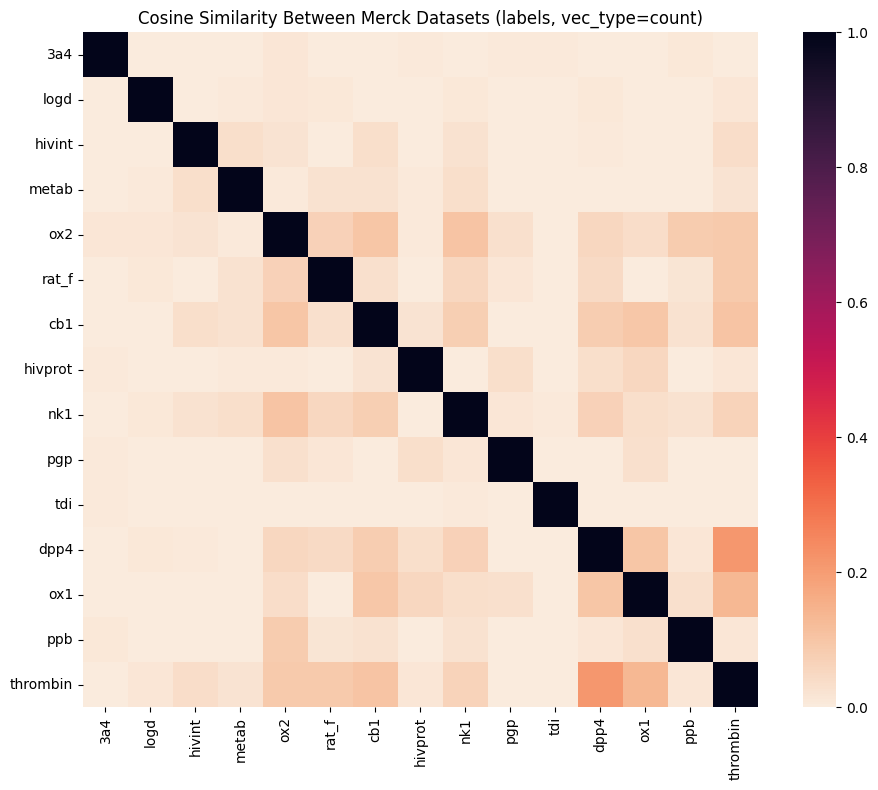

In [70]:
cos_sim_df_count_label = plot_cos_sim("count", "labels")

=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['PGP_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []


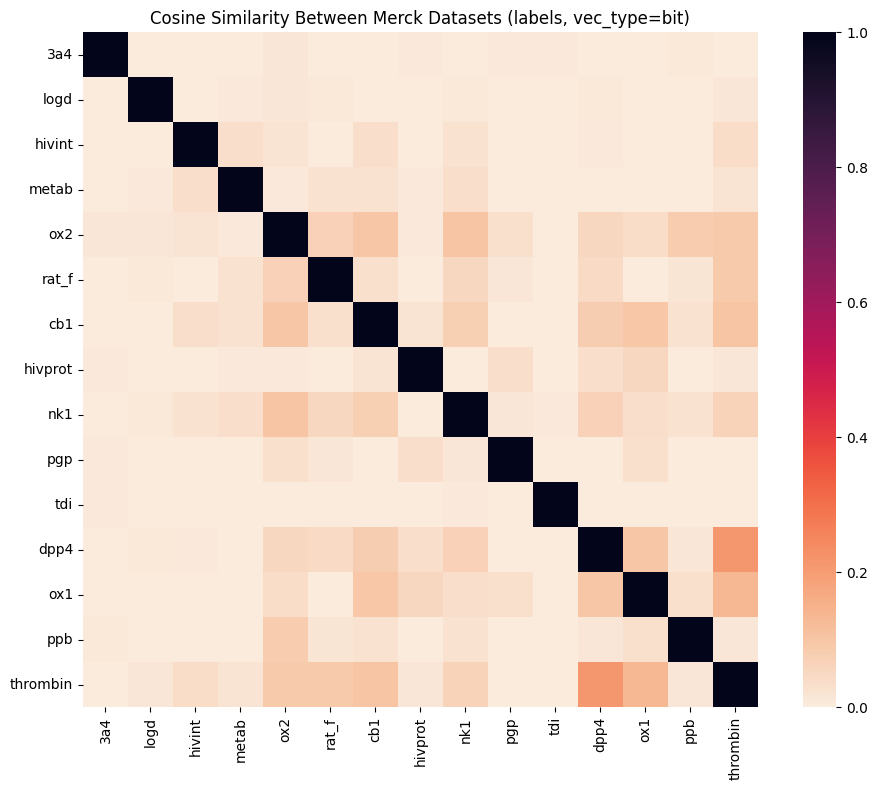

In [71]:
cos_sim_df_bit_label = plot_cos_sim("bit", "labels")


In [72]:
cos_sim_df_count_label == cos_sim_df_bit_label

,3a4,logd,hivint,metab,ox2,rat_f,cb1,hivprot,nk1,pgp,tdi,dpp4,ox1,ppb,thrombin
3a4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
logd,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
hivint,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
metab,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
ox2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
rat_f,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
cb1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
hivprot,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
nk1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
pgp,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
3a4 : (37241, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
logd : (37388, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
hivint : (1815, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
metab : (1569, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
ox2 : (11151, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
rat_f : (6105, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
cb1 : (8716, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
hivprot : (3212, 6560)
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_trai

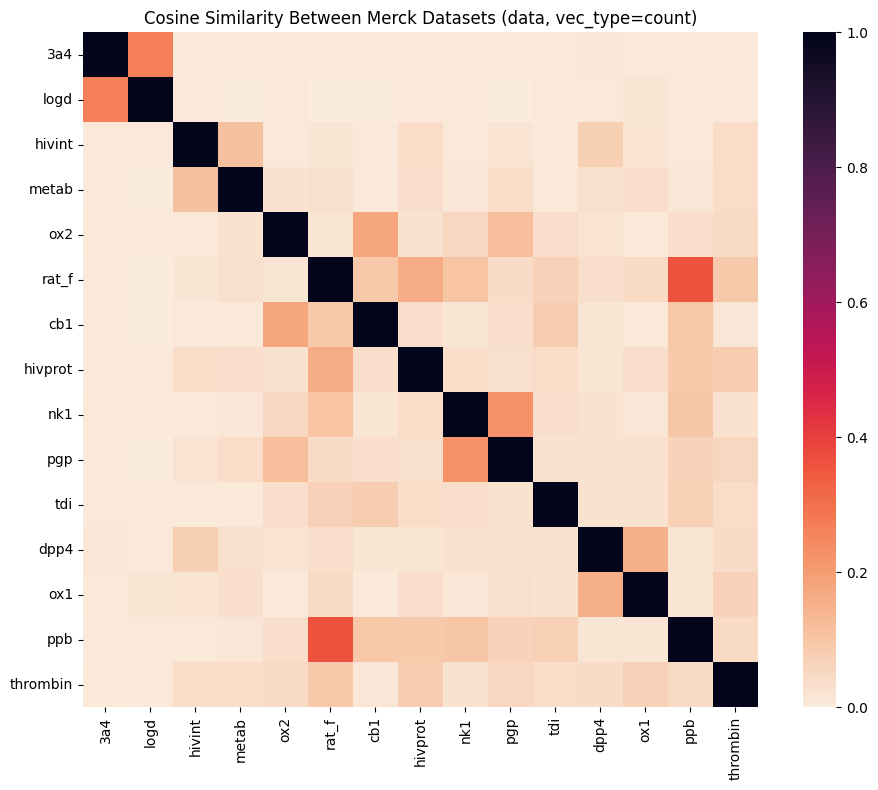

In [131]:
cos_sim_df_count_data = plot_cos_sim("count", "data")

=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['PGP_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []


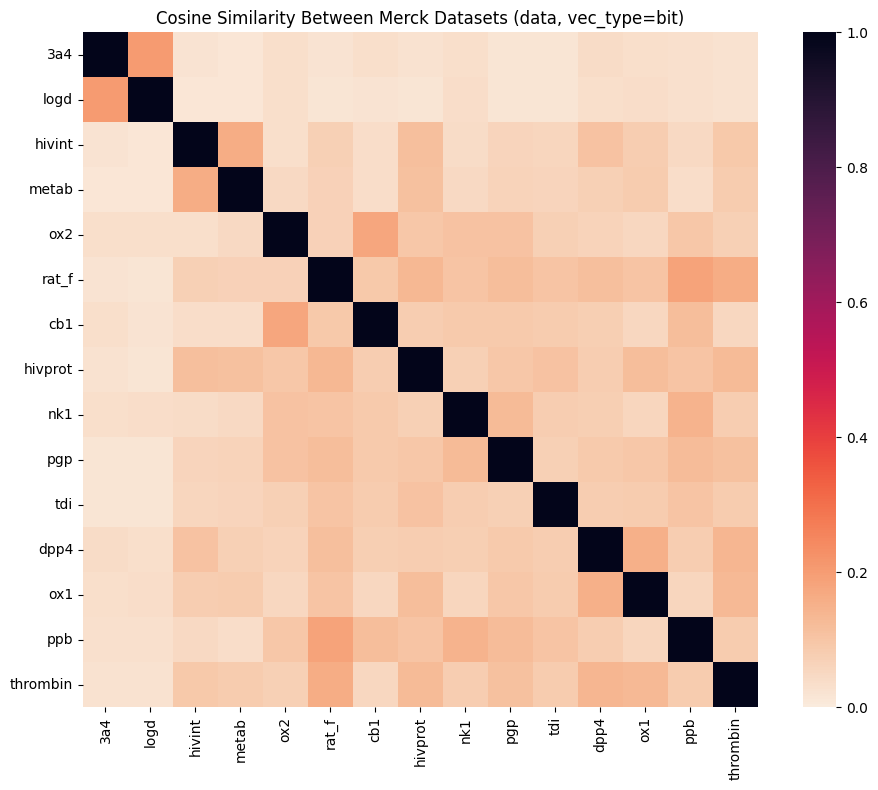

In [74]:
cos_sim_df_bit_data = plot_cos_sim("bit", "data")

In [75]:
cos_sim_df_count_data == cos_sim_df_bit_data

,3a4,logd,hivint,metab,ox2,rat_f,cb1,hivprot,nk1,pgp,tdi,dpp4,ox1,ppb,thrombin
3a4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
logd,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
hivint,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
metab,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ox2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
rat_f,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cb1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
hivprot,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nk1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pgp,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['PGP_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []


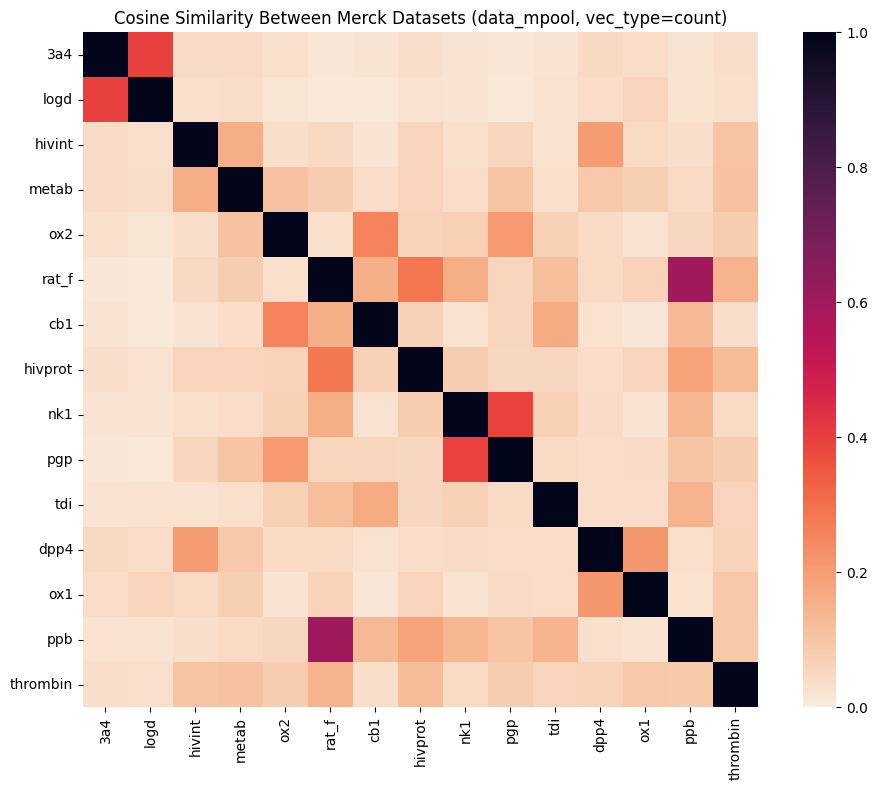

In [76]:
cos_sim_df_count_data_mpool =  plot_cos_sim("count", "data_mpool")

=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['PGP_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []


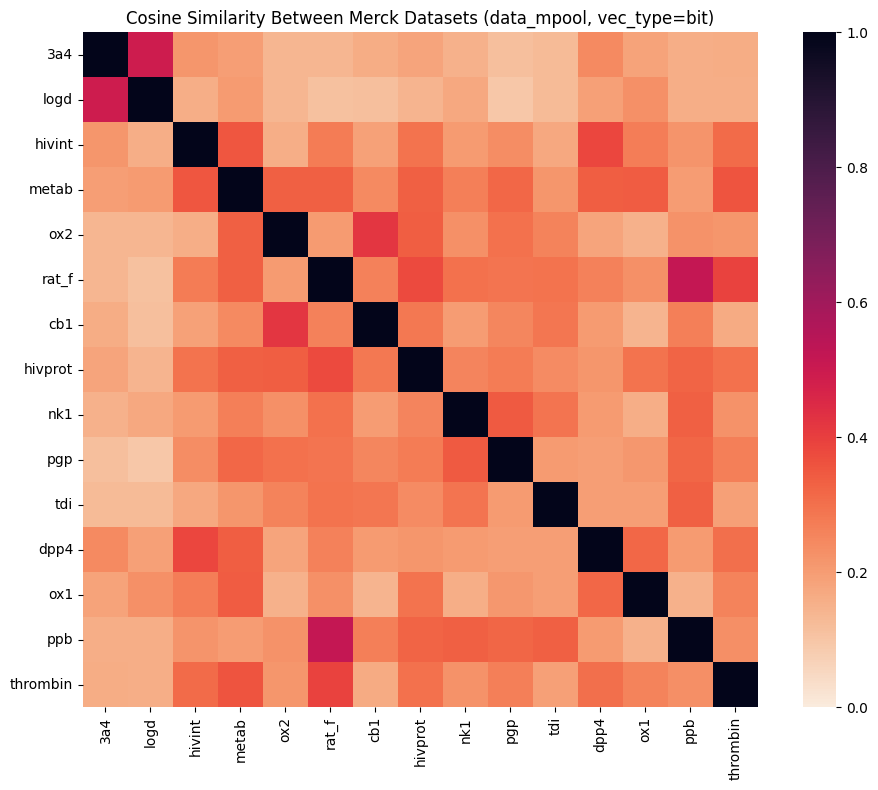

In [77]:
cos_sim_df_bit_data_mpool =  plot_cos_sim("bit", "data_mpool")


In [78]:
cos_sim_df_count_data_mpool == cos_sim_df_bit_data_mpool

,3a4,logd,hivint,metab,ox2,rat_f,cb1,hivprot,nk1,pgp,tdi,dpp4,ox1,ppb,thrombin
3a4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
logd,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
hivint,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
metab,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ox2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
rat_f,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cb1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
hivprot,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nk1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pgp,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
import numpy as np

# Instantiate datasets with different vec_types
count_dataset = Merck(split="train", vec_type="count", dataset="ox1", is_context=False, mvalid_dataset=[], exclude_mval_data_in_context=False)
bit_dataset = Merck(split="train", vec_type="bit", dataset="ox1", is_context=False, mvalid_dataset=[], exclude_mval_data_in_context=False)

# Use __getitem__ to get processed data
count_data = np.array([count_dataset[i][0].numpy() for i in range(len(count_dataset))])
bit_data = np.array([bit_dataset[i][0].numpy() for i in range(len(bit_dataset))])

# Compare
mean_abs_diff = np.abs(count_data - bit_data).mean()
fraction_diff = (count_data != bit_data).mean()

print("✅ Mean absolute difference between count and bit inputs:", mean_abs_diff)
print("✅ Fraction of elements that are different:", fraction_diff)


=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX1_train.pt']
✅ Mean absolute difference between count and bit inputs: 0.09949642
✅ Fraction of elements that are different: 0.024799102971407215


In [83]:
# Flatten the similarity matrix, exclude self-similarity (diagonal)
def print_most_high_small_sim_pair(cos_sim_df):
    sorted_similarities = (
        cos_sim_df.where(~np.eye(cos_sim_df.shape[0], dtype=bool))  # mask diagonal
        .stack()  # flatten to Series (multi-index)
        .reset_index()
    )

    # Rename columns for clarity
    sorted_similarities.columns = ['Dataset1', 'Dataset2', 'CosineSimilarity']

    # Sort descending (higher to lower similarity)
    sorted_high_to_low = sorted_similarities.sort_values(by='CosineSimilarity', ascending=False)

    # Sort ascending (lower to higher similarity)
    sorted_low_to_high = sorted_similarities.sort_values(by='CosineSimilarity', ascending=True)

    # Display top 10 most similar and least similar pairs
    print("🔝 Top 10 Most Similar Dataset Pairs:")
    print(sorted_high_to_low.head(10))

    print("\n🔻 Top 10 Least Similar Dataset Pairs:")
    print(sorted_low_to_high.head(10))


In [84]:
# Reuse the same sorted similarity list from before

def print_middle_sim_pair(cos_sim_df):
    sorted_similarities = (
        cos_sim_df.where(~np.eye(cos_sim_df.shape[0], dtype=bool))  # mask diagonal
        .stack()
        .reset_index()
    )
    sorted_similarities.columns = ['Dataset1', 'Dataset2', 'CosineSimilarity']

    # Sort full list
    sorted_similarities = sorted_similarities.sort_values(by='CosineSimilarity', ascending=True).reset_index(drop=True)

    # Total number of unique non-diagonal pairs
    n = len(sorted_similarities)

    # Define how many middle pairs to extract (e.g., 10)
    k = 10
    middle_start = n // 2 - k // 2
    middle_end = middle_start + k

    # Extract middle k pairs
    middle_pairs = sorted_similarities.iloc[middle_start:middle_end]

    print("🔘 Middle Similarity Dataset Pairs:")
    print(middle_pairs)

    # ['metab', 'ox2']
    # logd    rat_f
    # ppb      3a4

In [92]:
def print_most_high_small_sim_avg_dataset(cos_sim_df):
    # Copy the cosine similarity DataFrame to avoid modifying the original
    cos_sim_no_diag = cos_sim_df.copy()

    # Set diagonal (self-similarity) to NaN
    np.fill_diagonal(cos_sim_no_diag.values, np.nan)

    # Compute average similarity to other datasets (skip NaNs)
    average_similarities = cos_sim_no_diag.mean(axis=1)

    # Sort from highest to lowest average similarity
    sorted_avg_high_to_low = average_similarities.sort_values(ascending=False)

    # Sort from lowest to highest
    sorted_avg_low_to_high = average_similarities.sort_values(ascending=True)

    # print("🔝 Datasets with Highest Average Cosine Similarity to Others:")
    # print(sorted_avg_high_to_low)

    print("\n🔻 Datasets with Lowest Average Cosine Similarity to Others:")
    print(sorted_avg_low_to_high)


In [86]:
from collections import OrderedDict

# List of Merck datasets (task names)
dataset_names = [
    "3a4", "logd", "hivint", "metab", "ox2", "rat_f", "cb1", "hivprot", "nk1",
    "pgp", "tdi", "dpp4", "ox1", "ppb", "thrombin"
]

# Compute dataset sizes
dataset_sizes = {
    name: len(Merck(split="train", vec_type="count", dataset=name,
                    is_context=False, mvalid_dataset=[], exclude_mval_data_in_context=False))
    for name in dataset_names
}

# Sort from largest to smallest
sorted_sizes_desc = OrderedDict(sorted(dataset_sizes.items(), key=lambda x: x[1], reverse=True))

# Sort from smallest to largest
sorted_sizes_asc = OrderedDict(sorted(dataset_sizes.items(), key=lambda x: x[1]))

# Print both
print("📊 Dataset sizes (largest to smallest):")
for name, size in sorted_sizes_desc.items():
    print(f"{name}: {size}")

print("\n📉 Dataset sizes (smallest to largest):")
for name, size in sorted_sizes_asc.items():
    print(f"{name}: {size}")


=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['3A4_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['LOGD_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVINT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['METAB_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['OX2_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['RAT_F_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['CB1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['HIVPROT_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['NK1_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []
files  ['PGP_train.pt']
=====
MERCK_REAL exclude False
is_context  False
mvalid_dataset  []


In [87]:
import pandas as pd

# Example: assume cos_sim_df_count_label is already defined and available
# Sort similarity scores for '3a4' in descending order (most similar first)

sorted_similarity = cos_sim_df_count_label.loc["3a4"].sort_values(ascending=False)
sorted_similarity


3a4         1.000000
ox2         0.013278
ppb         0.009321
hivprot     0.005584
tdi         0.004839
pgp         0.004243
rat_f       0.002639
cb1         0.001760
dpp4        0.000081
logd       -0.000379
nk1        -0.000729
hivint     -0.004093
ox1        -0.005014
thrombin   -0.006219
metab      -0.007666
Name: 3a4, dtype: float64

In [99]:
sorted_similarity = cos_sim_df_count_label.loc["logd"].sort_values(ascending=False)
sorted_similarity

logd        1.000000
ox2         0.014796
thrombin    0.014589
dpp4        0.010591
nk1         0.009643
rat_f       0.008357
metab       0.005144
ppb         0.002477
hivprot     0.000692
3a4        -0.000379
cb1        -0.000888
pgp        -0.001212
tdi        -0.002036
hivint     -0.003574
ox1        -0.005039
Name: logd, dtype: float64

In [95]:
print_most_high_small_sim_avg_dataset(cos_sim_df_count_data)


🔻 Datasets with Lowest Average Cosine Similarity to Others:
logd        0.024936
3a4         0.026074
hivint      0.027504
metab       0.027875
tdi         0.033301
ox1         0.034642
dpp4        0.036151
thrombin    0.042081
ox2         0.042148
cb1         0.043021
hivprot     0.044275
nk1         0.047868
pgp         0.050616
ppb         0.067196
rat_f       0.076337
dtype: float32


In [96]:
print_most_high_small_sim_avg_dataset(cos_sim_df_bit_data)


🔻 Datasets with Lowest Average Cosine Similarity to Others:
logd        0.037169
3a4         0.039722
metab       0.065109
hivint      0.067301
tdi         0.073075
cb1         0.074474
ox2         0.076336
nk1         0.078796
ox1         0.081908
pgp         0.085141
dpp4        0.086345
ppb         0.088609
thrombin    0.090832
hivprot     0.091978
rat_f       0.097505
dtype: float32


In [97]:
print_most_high_small_sim_avg_dataset(cos_sim_df_count_data_mpool)


🔻 Datasets with Lowest Average Cosine Similarity to Others:
logd        0.052541
3a4         0.055378
ox1         0.058256
hivint      0.063352
tdi         0.064130
dpp4        0.068526
metab       0.071689
cb1         0.073093
ox2         0.077961
thrombin    0.078146
nk1         0.082745
hivprot     0.084749
pgp         0.090157
ppb         0.116649
rat_f       0.129786
dtype: float32


In [98]:
print_most_high_small_sim_avg_dataset(cos_sim_df_bit_data_mpool)


🔻 Datasets with Lowest Average Cosine Similarity to Others:
logd        0.178564
3a4         0.190759
tdi         0.224188
ox1         0.224375
cb1         0.228554
ox2         0.234961
nk1         0.237917
pgp         0.245326
dpp4        0.246222
hivint      0.246464
thrombin    0.253030
ppb         0.260788
hivprot     0.275690
rat_f       0.285227
metab       0.288616
dtype: float32


In [100]:
# Function to rank similarity scores within a given dataset (e.g., '3a4')
def rank_similarity_scores(cos_sim_df, dataset_name):
    ranked = cos_sim_df.loc[dataset_name].sort_values(ascending=False)
    return ranked

# Example usage:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "3a4")
print(ranked_3a4)


3a4         1.022415
logd        0.267381
dpp4        0.013893
ox2         0.011606
ox1         0.009982
thrombin    0.008623
nk1         0.008101
ppb         0.007808
cb1         0.007636
hivprot     0.006777
hivint      0.005648
metab       0.005018
tdi         0.004328
pgp         0.004221
rat_f       0.004020
Name: 3a4, dtype: float32


In [108]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "logd")
print(ranked_3a4)

logd        1.020343
3a4         0.267381
ox1         0.016389
dpp4        0.010328
ppb         0.008067
nk1         0.007909
thrombin    0.006548
ox2         0.006250
hivprot     0.004841
tdi         0.004788
hivint      0.003999
metab       0.003610
cb1         0.003415
pgp         0.002924
rat_f       0.002655
Name: logd, dtype: float32


In [104]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "hivprot")
print(print(ranked_3a4))

hivprot     1.002043
rat_f       0.162234
ppb         0.086478
thrombin    0.078293
hivint      0.035942
nk1         0.035575
tdi         0.035425
ox1         0.035014
metab       0.034063
cb1         0.031756
pgp         0.029102
ox2         0.025466
dpp4        0.018887
3a4         0.006777
logd        0.004841
Name: hivprot, dtype: float32
None


In [105]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "dpp4")
print(print(ranked_3a4))

dpp4        1.000180
ox1         0.152839
hivint      0.078025
thrombin    0.041530
rat_f       0.032559
metab       0.028066
pgp         0.026405
nk1         0.023629
tdi         0.023553
ox2         0.023001
hivprot     0.018887
ppb         0.016965
cb1         0.016430
3a4         0.013893
logd        0.010328
Name: dpp4, dtype: float32
None


In [107]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "nk1")
print(print(ranked_3a4))

nk1         1.005110
pgp         0.225876
rat_f       0.103224
ppb         0.100984
ox2         0.053951
hivprot     0.035575
tdi         0.032479
thrombin    0.026482
dpp4        0.023629
cb1         0.018581
ox1         0.012082
metab       0.012024
hivint      0.009252
3a4         0.008101
logd        0.007909
Name: nk1, dtype: float32
None


### COUNT

In [117]:
# 3a4, logd -> 작
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "hivprot")
print(print(ranked_3a4))

hivprot     1.002043
rat_f       0.162234
ppb         0.086478
thrombin    0.078293
hivint      0.035942
nk1         0.035575
tdi         0.035425
ox1         0.035014
metab       0.034063
cb1         0.031756
pgp         0.029102
ox2         0.025466
dpp4        0.018887
3a4         0.006777
logd        0.004841
Name: hivprot, dtype: float32
None


In [109]:
## hivprot COUNT 기준
# metab, ox2, logd, pgp, cb1 -> 3a4에 sim 큰
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "3a4")
print(print(ranked_3a4))

3a4         1.022415
logd        0.267381
dpp4        0.013893
ox2         0.011606
ox1         0.009982
thrombin    0.008623
nk1         0.008101
ppb         0.007808
cb1         0.007636
hivprot     0.006777
hivint      0.005648
metab       0.005018
tdi         0.004328
pgp         0.004221
rat_f       0.004020
Name: 3a4, dtype: float32
None


In [118]:
## hivprot COUNT 기준
# 3a4, metab, hivint, tdi, ox1 -> logd와 sim 큰/작 모두 
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "logd")
print(print(ranked_3a4))

logd        1.020343
3a4         0.267381
ox1         0.016389
dpp4        0.010328
ppb         0.008067
nk1         0.007909
thrombin    0.006548
ox2         0.006250
hivprot     0.004841
tdi         0.004788
hivint      0.003999
metab       0.003610
cb1         0.003415
pgp         0.002924
rat_f       0.002655
Name: logd, dtype: float32
None


In [119]:
# 큰/작 , 특이하게 hivint thrombin이 가장 높은 랭킹 쪽. 근데 작도 있긴 함 (ox1 매우 안좋고, 3a4는 그렇게 좋지 않음)
# TODO dpp4의 경우 thrombin 이 왜 좋은지에 대한 이유가 있다면 좋을듯
# 3a4는 좋지 않으나 ppb도 별로
# thrombin, logd, cb1
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "dpp4")
print(print(ranked_3a4))

dpp4        1.000180
ox1         0.152839
hivint      0.078025
thrombin    0.041530
rat_f       0.032559
metab       0.028066
pgp         0.026405
nk1         0.023629
tdi         0.023553
ox2         0.023001
hivprot     0.018887
ppb         0.016965
cb1         0.016430
3a4         0.013893
logd        0.010328
Name: dpp4, dtype: float32
None


In [123]:
# sim score 작 선호
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "thrombin")
print(print(ranked_3a4))

thrombin    0.999990
rat_f       0.090604
hivprot     0.078293
ox1         0.067700
pgp         0.051841
ppb         0.046311
ox2         0.043424
dpp4        0.041530
hivint      0.038564
tdi         0.038044
metab       0.035750
nk1         0.026482
cb1         0.015418
3a4         0.008623
logd        0.006548
Name: thrombin, dtype: float32
None


In [124]:
# sim score 작 with logd 선호
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "logd")
print(print(ranked_3a4))

logd        1.020343
3a4         0.267381
ox1         0.016389
dpp4        0.010328
ppb         0.008067
nk1         0.007909
thrombin    0.006548
ox2         0.006250
hivprot     0.004841
tdi         0.004788
hivint      0.003999
metab       0.003610
cb1         0.003415
pgp         0.002924
rat_f       0.002655
Name: logd, dtype: float32
None


In [126]:
# sim score 작 선호하는 편. 3a랑 ox1 가 안 좋아서 조금 애매
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "cb1")
print(print(ranked_3a4))

cb1         1.005645
ox2         0.179030
ppb         0.097495
rat_f       0.093237
tdi         0.080993
pgp         0.032672
hivprot     0.031756
nk1         0.018581
dpp4        0.016430
thrombin    0.015418
metab       0.010418
ox1         0.008322
3a4         0.007636
hivint      0.006890
logd        0.003415
Name: cb1, dtype: float32
None


In [127]:
# 작이 꽤 괜찮
# ox2, cb1, hivint, tdi, 3a4, logd, metab
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "nk1")
print(print(ranked_3a4))

nk1         1.005110
pgp         0.225876
rat_f       0.103224
ppb         0.100984
ox2         0.053951
hivprot     0.035575
tdi         0.032479
thrombin    0.026482
dpp4        0.023629
cb1         0.018581
ox1         0.012082
metab       0.012024
hivint      0.009252
3a4         0.008101
logd        0.007909
Name: nk1, dtype: float32
None


In [129]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "ox2")
print(print(ranked_3a4))

ox2         1.006444
cb1         0.179030
pgp         0.118150
nk1         0.053951
thrombin    0.043424
ppb         0.033864
tdi         0.032299
hivprot     0.025466
metab       0.024812
dpp4        0.023001
rat_f       0.016137
ox1         0.011676
3a4         0.011606
hivint      0.010408
logd        0.006250
Name: ox2, dtype: float32
None


In [128]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "logd")
print(print(ranked_3a4))

logd        1.020343
3a4         0.267381
ox1         0.016389
dpp4        0.010328
ppb         0.008067
nk1         0.007909
thrombin    0.006548
ox2         0.006250
hivprot     0.004841
tdi         0.004788
hivint      0.003999
metab       0.003610
cb1         0.003415
pgp         0.002924
rat_f       0.002655
Name: logd, dtype: float32
None


### dataset size (large to small)

logd: 37388

3a4: 37241

ox2: 11151

nk1: 9965

cb1: 8716

ppb: 8651

pgp: 6399

dpp4: 6148

rat_f: 6105

ox1: 5351

thrombin: 5059

tdi: 4165

hivprot: 3212

hivint: 1815

metab: 1569


COUNT 실제 정말 좋은 포인트가 많은 지점
TODO dpp4 tdi, thrombin이 왜 좋은지
TODO nk1 : tdi, cb1, ox2이 왜 좋은지 -> nk1이 데이터셋 크니까 큰 얘들이 중요한 역할을 한느 걸지도

hivprot : 3a4, logd, (hivint, pgp)
dpp4 : thrombin, cb1, logd, (tdi)
nk1 : tdi, cb1, ox2, 3a4, hivint, logd

### Bit

In [116]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_bit_data, "hivprot")
print(print(ranked_3a4))

hivprot     0.999998
rat_f       0.133435
thrombin    0.126639
ox1         0.120368
hivint      0.115824
metab       0.111552
tdi         0.108664
ppb         0.101902
pgp         0.096930
ox2         0.096153
dpp4        0.081374
cb1         0.078347
nk1         0.073359
3a4         0.024909
logd        0.018241
Name: hivprot, dtype: float32
None


In [114]:
## hivprot BIT 기준
# 
ranked_3a4 = rank_similarity_scores(cos_sim_df_bit_data, "3a4")
print(print(ranked_3a4))

3a4         0.999623
logd        0.206171
dpp4        0.042197
ox2         0.035018
cb1         0.033457
nk1         0.033170
ox1         0.031345
ppb         0.031216
thrombin    0.026089
hivprot     0.024909
rat_f       0.021575
hivint      0.020464
pgp         0.019096
tdi         0.016530
metab       0.014877
Name: 3a4, dtype: float32
None


In [110]:
# metab, hivint, ox1
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "logd")
print(print(ranked_3a4))

logd        1.020343
3a4         0.267381
ox1         0.016389
dpp4        0.010328
ppb         0.008067
nk1         0.007909
thrombin    0.006548
ox2         0.006250
hivprot     0.004841
tdi         0.004788
hivint      0.003999
metab       0.003610
cb1         0.003415
pgp         0.002924
rat_f       0.002655
Name: logd, dtype: float32
None


In [111]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "hivint")
print(print(ranked_3a4))

hivint      1.000003
metab       0.112794
dpp4        0.078025
thrombin    0.038564
hivprot     0.035942
pgp         0.020970
ox1         0.020905
rat_f       0.018992
tdi         0.011358
ppb         0.011308
ox2         0.010408
nk1         0.009252
cb1         0.006890
3a4         0.005648
logd        0.003999
Name: hivint, dtype: float32
None


In [112]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "cb1")
print(ranked_3a4)

cb1         1.005645
ox2         0.179030
ppb         0.097495
rat_f       0.093237
tdi         0.080993
pgp         0.032672
hivprot     0.031756
nk1         0.018581
dpp4        0.016430
thrombin    0.015418
metab       0.010418
ox1         0.008322
3a4         0.007636
hivint      0.006890
logd        0.003415
Name: cb1, dtype: float32


In [113]:
ranked_3a4 = rank_similarity_scores(cos_sim_df_count_data, "thrombin")
print(ranked_3a4)

thrombin    0.999990
rat_f       0.090604
hivprot     0.078293
ox1         0.067700
pgp         0.051841
ppb         0.046311
ox2         0.043424
dpp4        0.041530
hivint      0.038564
tdi         0.038044
metab       0.035750
nk1         0.026482
cb1         0.015418
3a4         0.008623
logd        0.006548
Name: thrombin, dtype: float32
